In [2]:
from datasets import load_dataset

from transformers import pipeline
from PIL import Image


c:\Users\Daed\AppData\Local\Programs\Python\Python311\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
newyorker491 = load_dataset("alex-smith/newyorker_CS491")
newyorker491=newyorker491['train']

newyorker491

Dataset({
    features: ['image', 'contest_number', 'image_location', 'image_description', 'image_uncanny_description', 'questions', 'caption_choices', 'label', 'contest_count', 'scene'],
    num_rows: 2601
})

In [4]:
pipe_large = pipeline("image-to-text", model="microsoft/git-large",max_new_tokens=50)
pipe_base = pipeline("image-to-text", model="microsoft/git-base",max_new_tokens=50)

description generated by large model:
 wild west drawing - a cowboy is seen in a sheriff's office by [ unused0 ]


description generated by base model:
 cat in the hat


my description: wind-up men work in cubicals 


human description from dataset:
 A cowboy is in a wooden room. There is a baby and several animals present, and guns on the wall.


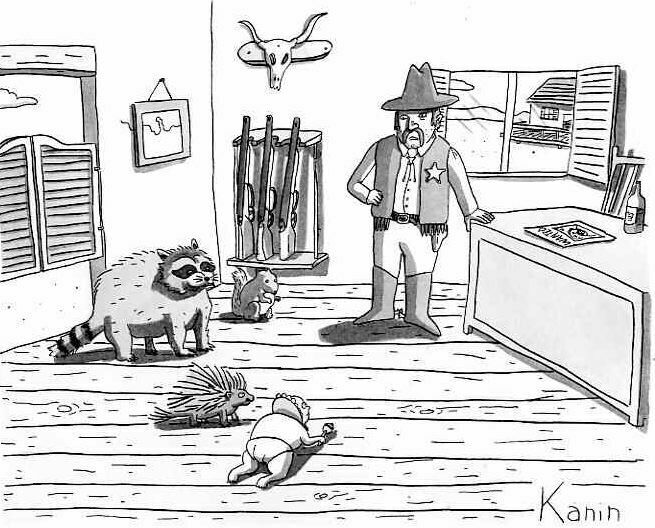

In [10]:
# #Patience--we are feeding the image through through two image to text
# transformers!
k=323
img = newyorker491[k]['image']

# Apply the models to the image
result_large = pipe_large(img)
generated_text_large=result_large[0]['generated_text']

result_base = pipe_base(img)
generated_text_base=result_base[0]['generated_text']
# Print the result
print(f"description generated by large model:\n {generated_text_large}\n\n")
print(f"description generated by base model:\n {generated_text_base}\n\n")
print(f"my description: wind-up men work in cubicals \n\n")

print(f"human description from dataset:\n {newyorker491[k]['image_description']}")
img